In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import radians, cos, sin, asin, sqrt
from datetime import datetime 
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
files=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# data

In [3]:
data=pd.read_csv(files[0],parse_dates=["key"])

In [4]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['key'] = pd.to_datetime(data['key'])

In [5]:
data.loc[0,'key'].year
data.loc[0,'key'].hour
data.loc[0,'key'].minute
data.loc[0,'key'].second
data.loc[0,'key'].day
data.loc[0,'key'].month

5

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  datetime64[ns]     
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), int64(2)
memory usage: 13.7 MB


In [7]:
data['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [8]:
data[data['passenger_count']==1].count()

Unnamed: 0           138425
key                  138425
fare_amount          138425
pickup_datetime      138425
pickup_longitude     138425
pickup_latitude      138425
dropoff_longitude    138425
dropoff_latitude     138425
passenger_count      138425
dtype: int64

In [9]:
data[data['passenger_count']==2].count()

Unnamed: 0           29428
key                  29428
fare_amount          29428
pickup_datetime      29428
pickup_longitude     29428
pickup_latitude      29428
dropoff_longitude    29428
dropoff_latitude     29428
passenger_count      29428
dtype: int64

In [10]:
data[data['passenger_count']==3].count()

Unnamed: 0           8881
key                  8881
fare_amount          8881
pickup_datetime      8881
pickup_longitude     8881
pickup_latitude      8881
dropoff_longitude    8881
dropoff_latitude     8881
passenger_count      8881
dtype: int64

In [11]:
data[data['passenger_count']==4].count()

Unnamed: 0           4276
key                  4276
fare_amount          4276
pickup_datetime      4276
pickup_longitude     4276
pickup_latitude      4276
dropoff_longitude    4276
dropoff_latitude     4276
passenger_count      4276
dtype: int64

In [12]:
data[data['passenger_count']==5].count()

Unnamed: 0           14009
key                  14009
fare_amount          14009
pickup_datetime      14009
pickup_longitude     14009
pickup_latitude      14009
dropoff_longitude    14009
dropoff_latitude     14009
passenger_count      14009
dtype: int64

In [13]:
data[data['passenger_count']==6].count()

Unnamed: 0           4271
key                  4271
fare_amount          4271
pickup_datetime      4271
pickup_longitude     4271
pickup_latitude      4271
dropoff_longitude    4271
dropoff_latitude     4271
passenger_count      4271
dtype: int64

In [14]:
data[data['passenger_count']==208].count()

Unnamed: 0           1
key                  1
fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [15]:
data[data['passenger_count']==0].count()

Unnamed: 0           709
key                  709
fare_amount          709
pickup_datetime      709
pickup_longitude     709
pickup_latitude      709
dropoff_longitude    708
dropoff_latitude     708
passenger_count      709
dtype: int64

In [16]:
data[data['passenger_count']==0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
333,2137942,2011-08-05 07:03:08.000000100,10.1,2011-08-05 07:03:08+00:00,-74.013900,40.707800,-73.992300,40.749300,0
908,8484351,2011-09-06 12:25:19.000000200,11.7,2011-09-06 12:25:19+00:00,-73.981000,40.764600,-73.962900,40.778400,0
926,32941306,2012-03-26 18:11:24.000000200,3.3,2012-03-26 18:11:24+00:00,-73.979978,40.765821,-73.983894,40.766873,0
2000,12591041,2012-04-20 15:07:57.000000300,15.7,2012-04-20 15:07:57+00:00,-73.975285,40.750138,-73.974729,40.783151,0
3011,39400625,2012-01-07 19:19:08.000000400,6.1,2012-01-07 19:19:08+00:00,-73.977900,40.789100,-73.983700,40.773600,0
...,...,...,...,...,...,...,...,...,...
196797,26965490,2011-01-17 15:52:26.000000200,3.3,2011-01-17 15:52:26+00:00,-74.000760,40.757637,-74.004852,40.751947,0
197103,49116579,2011-12-10 15:33:12.000000800,7.3,2011-12-10 15:33:12+00:00,0.000000,0.000000,0.000000,0.000000,0
198872,12988511,2011-09-20 19:55:05.000000100,5.7,2011-09-20 19:55:05+00:00,-73.980300,40.742800,-73.967900,40.755600,0
198902,54393172,2011-08-22 21:10:56.000000200,12.1,2011-08-22 21:10:56+00:00,-73.996700,40.737200,-74.008500,40.704000,0


In [17]:
data['fare_amount'].unique()
a=min(data['fare_amount'].unique())
b=max(data['fare_amount'].unique())
print(a,b)

-52.0 499.0


In [18]:
# fare amt distribution as per the given data

# dollars                  catagory
# <0                         O
# 1-10                       A
# 11-25                      B
# 26-75                      C
# 76-100                     D
# 101-200                    E
# 201-300                    F
# 301-400                    G
# 401-500                    H

In [19]:
# data['fare_amount']

In [20]:
# o=[]
# a=[]
# b=[]
# c=[]
# d=[]
# e=[]
# f=[]
# g=[]
# h=[]
# for i in data.fare_amount:
#     if(data.fare_amount < 0):
#         o.append(i)
#     elif(data['fare_amount']>=0 and data['fare_amount']<10 and data['fare_amount']!='nan' ):
#         a.append(i)
#     elif(data['fare_amount']>=10 and data['fare_amount']<25 and data['fare_amount']!='nan'):
#         b.append(i)
#     elif(data['fare_amount']>=25 and data['fare_amount']<75 and data['fare_amount']!='nan'):
#         c.append(i)
#     elif(data['fare_amount']>=75 and data['fare_amount']<100 and data['fare_amount']!='nan'):
#         d.append(i)
#     elif(data['fare_amount']>=100 and data['fare_amount']<200 and data['fare_amount']!='nan'):
#         e.append(i)
#     elif(data['fare_amount']>=200 and data['fare_amount']<300 and data['fare_amount']!='nan'):
#         f.append(i)
#     elif(data['fare_amount']>=300 and data['fare_amount']<400 and data['fare_amount']!='nan'):
#         g.append(i)
#     elif(data['fare_amount']>=400 and data['fare_amount']<500 and data['fare_amount']!='nan'):
#         h.append(i)

In [21]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [22]:
lat1=[]
lat2=[]
lon1=[]
lon2=[]
for i in data['pickup_latitude']:
    lat1.append(i)
for i in data['dropoff_latitude']:
    lat2.append(i)
for i in data['pickup_longitude']:
    lon1.append(i)
for i in data['dropoff_longitude']:
    lon2.append(i)


In [23]:
dist=[]
rows,cols=data.shape
for d in data:
    data['dist']=np.zeros(rows)
data.head()
# data.shape

for index in data.index:
    lon1, lat1, lon2, lat2 = map(radians, [data.loc[index,'pickup_longitude'], data.loc[index,'pickup_latitude'], data.loc[index,'dropoff_longitude'], data.loc[index,'dropoff_latitude']])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    data.loc[index,'dist'] = (c * r)
    data.dist=round(data.dist)
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2.0
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.0
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.0
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.0
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.0
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2.0
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,13.0
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4.0


In [24]:
dist=[]
rows,cols=data.shape
for d in data:
    data['dollar_per_km']=np.zeros(rows)
data.head()
# data.shape

for index in data.index:
    d=data.loc[index,'dist']
#     lon1, lat1, lon2, lat2 = map(radians, [data.loc[index,'pickup_longitude'], data.loc[index,'pickup_latitude'], data.loc[index,'dropoff_longitude'], data.loc[index,'dropoff_latitude']])
#     dlon = lon2 - lon1 
#     dlat = lat2 - lat1 
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    
    c = data.loc[index,'fare_amount'] 
    if d != 0:
        data.loc[index,'dollar_per_km'] = (c / d)
#     data.dollar_per_km=round(data.dollar_per_km)
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,dollar_per_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2.0,3.750000
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.0,3.850000
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.0,2.580000
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2.0,2.650000
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.0,0.000000
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2.0,3.750000
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,13.0,2.376923
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4.0,3.625000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  datetime64[ns]     
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
 9   dist               199999 non-null  float64            
 10  dollar_per_km      199999 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(7), int64(2)
memory usage: 16.8 MB


In [26]:
max(data.dollar_per_km),min(data.dollar_per_km)

(150.0, -5.7)

In [27]:
# if data.dollar_per_km <= 0:
#     drop(data.index)

In [28]:
# dollars/km                  catagory
# <0                         O
# 1-10                       A
# 11-25                      B
# 26-75                      C
# 76-100                     D
# 101-200                    E
# 201-300                    F
# 301-400                    G
# 401-500                    H

In [29]:

data['Date']=data['key'].dt.year
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,dollar_per_km,Date
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2.0,3.750000,2015
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.0,3.850000,2009
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.0,2.580000,2009
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2.0,2.650000,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.0,4.000000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.0,0.000000,2012
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2.0,3.750000,2014
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,13.0,2.376923,2009
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4.0,3.625000,2015


In [30]:
data


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,dollar_per_km,Date
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2.0,3.750000,2015
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.0,3.850000,2009
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.0,2.580000,2009
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2.0,2.650000,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.0,4.000000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.0,0.000000,2012
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2.0,3.750000,2014
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,13.0,2.376923,2009
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4.0,3.625000,2015


In [31]:


# rows,cols=data.shape

# for d in dollar_per_km:
#     data['a']=np.zeros(rows)
#     data['b']=np.zeros(rows)
#     data['c']=np.zeros(rows)
#     data['d']=np.zeros(rows)
#     data['e']=np.zeros(rows)
# data.head()

# for index in data.index:
#     if(data.loc[index,'dollar_per_km']=='Fa'and str(data.loc[index,'dollar_per_km']) != 'nan'):
#         data.loc[index,'a']=1
#     elif(data.loc[index,'dollar_per_km']=='Ex'and str(data.loc[index,'dollar_per_km']) != 'nan'):
#         data.loc[index,'b']=1
#     elif(data.loc[index,'dollar_per_km']=='TA'and str(data.loc[index,'dollar_per_km']) != 'nan'):
#         data.loc[index,'c']=1
#     elif(data.loc[index,'dollar_per_km']=='Gd'and str(data.loc[index,'dollar_per_km']) != 'nan'):
#         data.loc[index,'d']=1
#     elif(data.loc[index,'dollar_per_km']=='Po'and str(data.loc[index,'dollar_per_km']) != 'nan'):
#         data.loc[index,'e']=1
# #     elif(data.loc[index,'GarageQual']=='nan'):
# #         data.loc[index,]
# data

In [32]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,dollar_per_km,Date
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2.0,3.750000,2015
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.0,3.850000,2009
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.0,2.580000,2009
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2.0,2.650000,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.0,4.000000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.0,0.000000,2012
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2.0,3.750000,2014
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,13.0,2.376923,2009
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4.0,3.625000,2015


In [33]:
data['date'] = data['key'].copy().apply(lambda x : x.strftime('%Y-%m-%d'))

In [34]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,dollar_per_km,Date,date
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2.0,3.750000,2015,2015-05-07
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.0,3.850000,2009,2009-07-17
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.0,2.580000,2009,2009-08-24
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2.0,2.650000,2009,2009-06-26
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.0,4.000000,2014,2014-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.0,0.000000,2012,2012-10-28
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2.0,3.750000,2014,2014-03-14
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,13.0,2.376923,2009,2009-06-29
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4.0,3.625000,2015,2015-05-20


In [35]:
import plotly.graph_objects as go

# print(data['dollar_per_km']+10)
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
# fig = go.Figure(data=[go.Candlestick(x=df['Date'],
#                 open=df['AAPL.Open'],
#                 high=df['AAPL.High'],
#                 low=df['AAPL.Low'],
#                 close=df['AAPL.Close'])])

# fig.show()
fig = go.Figure(data=[go.Candlestick(x=data['date'][:10]
                                     ,
                open=data['dollar_per_km'][:10],
                high=data['dollar_per_km'][:10]+10,
                low=data['dollar_per_km'][:10]-10,
                close=data['dollar_per_km'][:10]-4
                                    )])

fig.show()


In [36]:
data['date'] = data['key'].copy().apply(lambda x : x.strftime('%Y-%m-%d'))

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  datetime64[ns]     
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
 9   dist               199999 non-null  float64            
 10  dollar_per_km      199999 non-null  float64            
 11  Date               200000 non-null  int64              
 12  date               200000 non-

In [38]:
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
# df.info()

In [39]:
data[data['dollar_per_km'] <= 0].index

Int64Index([     5,      7,     11,     12,     44,     48,     65,     81,
                84,     92,
            ...
            199789, 199806, 199847, 199880, 199883, 199917, 199932, 199963,
            199988, 199995],
           dtype='int64', length=11656)

In [40]:
data.drop(index = data[data['dollar_per_km'] <= 0].index)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,dollar_per_km,Date,date
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2.0,3.750000,2015,2015-05-07
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.0,3.850000,2009,2009-07-17
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.0,2.580000,2009,2009-08-24
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2.0,2.650000,2009,2009-06-26
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.0,4.000000,2014,2014-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,1.0,12.000000,2014,2014-01-31
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2.0,3.750000,2014,2014-03-14
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,13.0,2.376923,2009,2009-06-29
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4.0,3.625000,2015,2015-05-20


In [41]:
spdata=data[['Date']]
spdata=spdata.value_counts().to_frame()
spdata

,0
Date,
2012,32396
2011,31945
2013,31195
2009,30536
2010,30194
2014,29968
2015,13766


   Date  count
3  2009  30536
4  2010  30194
1  2011  31945
0  2012  32396
2  2013  31195
5  2014  29968
6  2015  13766


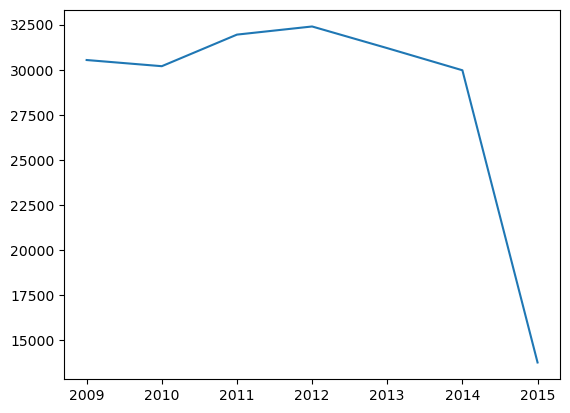

In [42]:
spdata = data[['Date']]
spdata = spdata.value_counts().to_frame()
spdata.reset_index(level=[0], inplace=True)
spdata = spdata.rename(columns = {0:'count'})
spdata = spdata.sort_values(by=['Date'],ascending=True)
print(spdata)

# print(spdata, spdata.count)
fig, ax = plt.subplots()
ax.plot(spdata['Date'],spdata['count'] )

# # ax.legend()

plt.show()

In [43]:
# sppdata=data[['Date','dollar_per_km']]
# sppdata=sppdata.value_counts().to_frame()
# sppdata
sp=data.groupby('Date').aggregate(np.mean)

In [44]:
sp['dollar_per_km']

Date
2009    3.597015
2010    3.615886
2011    3.564504
2012    3.750478
2013    4.236905
2014    4.336884
2015    4.387882
Name: dollar_per_km, dtype: float64

In [45]:
dv=data.groupby('Date').aggregate(np.std)
dv

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,dollar_per_km
Date,,,,,,,,,
2009,1.597024e+07,8.149551,8.942126,4.411107,7.886227,4.344442,1.244647,193.351608,1.909742
2010,1.602251e+07,8.356722,11.264261,5.838467,10.565492,5.820591,1.722352,175.076316,2.435917
2011,1.605851e+07,8.969445,14.099698,12.884656,22.371502,9.131253,1.267901,365.238564,2.001922
2012,1.597367e+07,9.485738,12.339131,6.711821,11.853349,6.662497,1.325450,432.273327,1.989937
2013,1.599145e+07,11.136450,11.511418,8.351981,11.605955,8.388765,1.372469,361.283051,2.354544
2014,1.605199e+07,11.610844,10.546445,5.809896,10.554625,5.814404,1.360605,535.537750,2.458791
2015,1.605026e+07,11.353959,9.045756,4.983157,8.719877,4.803776,1.341609,556.260094,2.172085


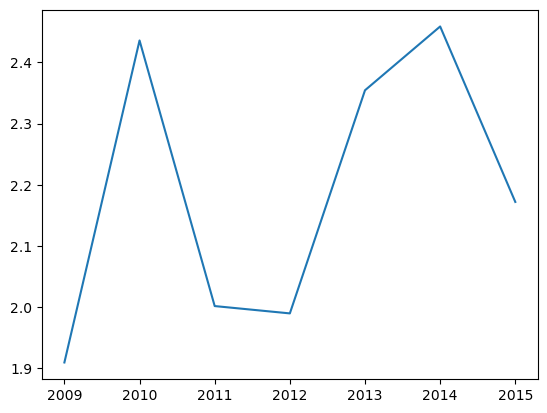

   Date    Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
0  2009  1.597024e+07     8.149551          8.942126         4.411107   
1  2010  1.602251e+07     8.356722         11.264261         5.838467   
2  2011  1.605851e+07     8.969445         14.099698        12.884656   
3  2012  1.597367e+07     9.485738         12.339131         6.711821   
4  2013  1.599145e+07    11.136450         11.511418         8.351981   
5  2014  1.605199e+07    11.610844         10.546445         5.809896   
6  2015  1.605026e+07    11.353959          9.045756         4.983157   

   dropoff_longitude  dropoff_latitude  passenger_count        dist  \
0           7.886227          4.344442         1.244647  193.351608   
1          10.565492          5.820591         1.722352  175.076316   
2          22.371502          9.131253         1.267901  365.238564   
3          11.853349          6.662497         1.325450  432.273327   
4          11.605955          8.388765         1.372469  361

In [46]:
dv=data.groupby('Date').aggregate(np.std)
# dv
fig, ax = plt.subplots()
dv.reset_index(level=[0], inplace=True)
ax.plot(dv.Date,dv.dollar_per_km )

# # ax.legend()

plt.show()
print(dv)


In [47]:
pase=data['passenger_count']
print(max(pase))
print(min(pase))



208
0


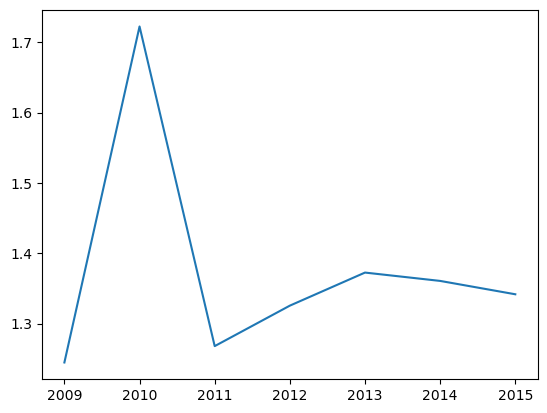

   Date    Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
0  2009  1.597024e+07     8.149551          8.942126         4.411107   
1  2010  1.602251e+07     8.356722         11.264261         5.838467   
2  2011  1.605851e+07     8.969445         14.099698        12.884656   
3  2012  1.597367e+07     9.485738         12.339131         6.711821   
4  2013  1.599145e+07    11.136450         11.511418         8.351981   
5  2014  1.605199e+07    11.610844         10.546445         5.809896   
6  2015  1.605026e+07    11.353959          9.045756         4.983157   

   dropoff_longitude  dropoff_latitude  passenger_count        dist  \
0           7.886227          4.344442         1.244647  193.351608   
1          10.565492          5.820591         1.722352  175.076316   
2          22.371502          9.131253         1.267901  365.238564   
3          11.853349          6.662497         1.325450  432.273327   
4          11.605955          8.388765         1.372469  361

In [48]:
dv=data.groupby('Date').aggregate(np.std)
# dv
fig, ax = plt.subplots()
dv.reset_index(level=[0], inplace=True)
ax.plot(dv.Date,dv.passenger_count )

# # ax.legend()

plt.show()
print(dv)